In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.spatial import ConvexHull
from myConvexHull import myConvexHull

In [2]:
data = datasets.load_iris() 
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 
print(df.shape)
print(df)

(150, 5)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Target  
0   

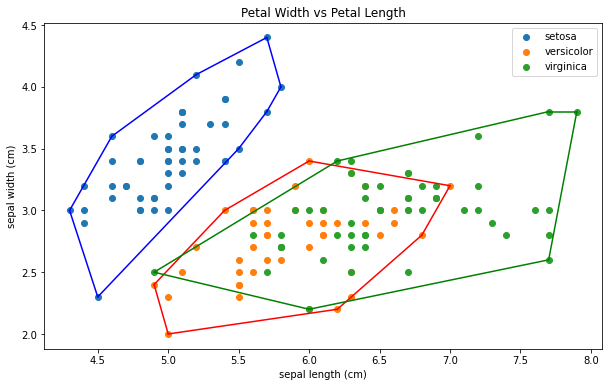

In [6]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
  hull = ConvexHull(bucket) 
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])

  for simplex in hull.simplices:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])

plt.legend()


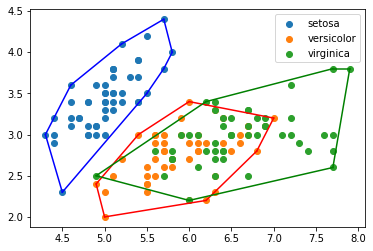

In [8]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
  hull = myConvexHull(bucket)
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])

  for simplex in hull:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
    
plt.legend()